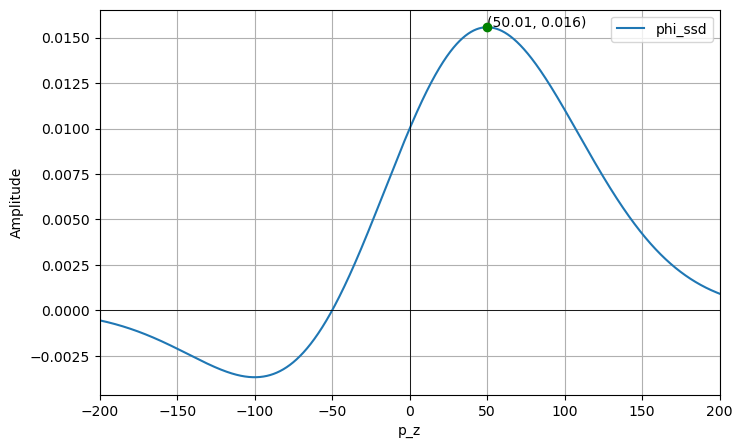

strong regime


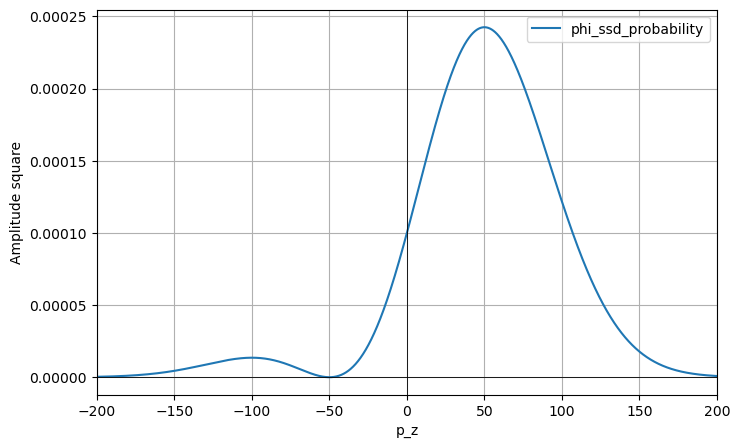

In [2]:
"""
Code for a particular value of epsilon and delta
AAV vs SSD pointer functions
"""

# ===============================
# Import packages
# ===============================
import numpy as np
import matplotlib.pyplot as plt


# ===============================
# Parameters
# ===============================
lembda = 1                     # constant, mu*(∂/∂z (B_z))
epsilen = 0.01
alpha = np.pi - 2 * epsilen     # angle between pre- and post-selected spin states
delta =  0.01                 # spread in position of pointer

a = 1000                        # max range on x axis
c = 80000                       # number of grid points on x axis
b = 200                           # x-axis limits


# ===============================
# Function definitions
# ===============================

# AAV’s pointer function
def phi_aav_func(alpha, delta, lembda, p):
    return np.cos(alpha / 2) * np.exp((-delta**2) * (p - lembda * np.tan(alpha / 2))**2)


# SSD’s pointer function
def phi_ssd_func(alpha, delta, lembda, p):
    c1 = 0.5 * (np.cos(alpha / 2) + np.sin(alpha / 2))
    c2 = 0.5 * (np.cos(alpha / 2) - np.sin(alpha / 2))
    return c1 * np.exp((-delta**2) * (p - lembda)**2) + c2 * np.exp((-delta**2) * (p + lembda)**2)


# ===============================
# Variables
# ===============================
p = np.linspace(-a, +a, c)

# Arrays
phi_aav = np.zeros(len(p))
phi_ssd = np.zeros(len(p))

# Compute values
for i in range(len(p)):
    phi_aav[i] = phi_aav_func(alpha, delta, lembda, p[i])
    phi_ssd[i] = phi_ssd_func(alpha, delta, lembda, p[i])


# ===============================
# Find peaks
# ===============================
idx_aav = np.argmax(phi_aav)
idx_ssd = np.argmax(phi_ssd)

peak_aav = (p[idx_aav], phi_aav[idx_aav])
peak_ssd = (p[idx_ssd], phi_ssd[idx_ssd])


# ===============================
# Plot: AAV vs SSD
# ===============================
plt.figure(figsize=(8, 5))
#plt.plot(p, phi_aav, label='phi_aav')
plt.plot(p, phi_ssd, label='phi_ssd')
plt.xlabel('p_z')
plt.ylabel('Amplitude')

# Mark peaks
#plt.scatter(*peak_aav, color='red', zorder=5)
#plt.annotate(f"({peak_aav[0]:.2f}, {peak_aav[1]:.3f})", xy=peak_aav)
plt.scatter(*peak_ssd, color='green', zorder=5)
plt.annotate(f"({peak_ssd[0]:.2f}, {peak_ssd[1]:.3f})", xy=peak_ssd)

# Always show axes at origin
plt.axhline(0, color="black", linewidth=0.6)
plt.axvline(0, color="black", linewidth=0.6)

plt.grid()
plt.legend()
plt.xlim(-b, b)
plt.show()


# ===============================
# Weak regime check
# ===============================
if delta < epsilen:
    print('weak regime')
else:
    print('strong regime')


# ===============================
# Probability plot
# ===============================
phi_aav_square = phi_aav**2
phi_ssd_square = phi_ssd**2

plt.figure(figsize=(8, 5))
# plt.plot(p, phi_aav_square, label='phi_aav_probability')
plt.plot(p, phi_ssd_square, label='phi_ssd_probability')
plt.xlabel('p_z')
plt.ylabel('Amplitude square')
plt.xlim(-b, b)

# Always show axes at origin
plt.axhline(0, color="black", linewidth=0.6)
plt.axvline(0, color="black", linewidth=0.6)

plt.grid()
plt.legend()
plt.show()
